### Extra trees feature scoring

In [1]:
import seaborn as sns
sns.set_style('white')
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
try:
    # Only run the experiments again if data hasn't been generated yet
    results=load_results('./results_analysis1.tar.gz')
except IOError:
    # Sequentially run experiments for 100 scenario's and 100 policies
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=100)

In [3]:
#observing the simulation runs
experiments, outcomes = results

##### 'A.3_Expected Annual Damage'

In [4]:
# Calculate feature scores
scores = feature_scoring.get_ex_feature_scores(experiments, outcomes['A.3_Expected Annual Damage'],
                                      max_features=17, mode=RuleInductionType.REGRESSION, nr_trees=1000)[0]

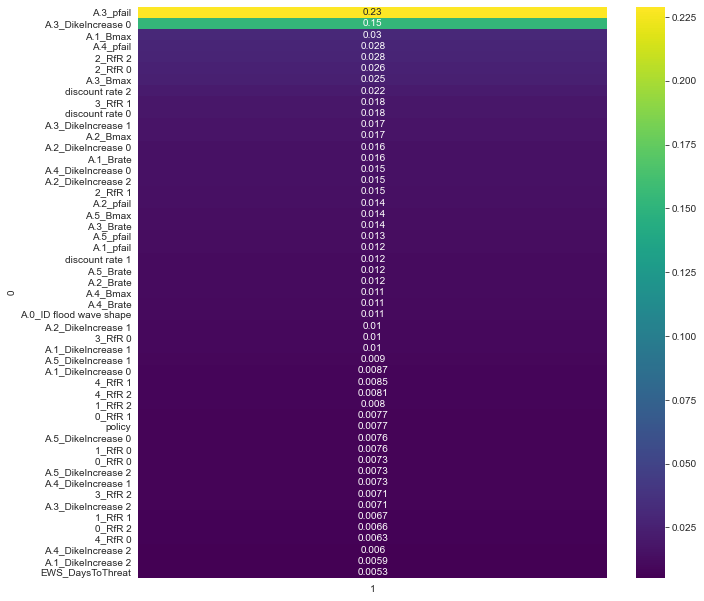

In [5]:
# Show results in heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores, cmap='viridis', annot=True)
fig.set_size_inches(10.5, 10.5, forward=True)
plt.show()

In [6]:
# Show convergence over the number of samples
combined_scores = []
for j in range(100, experiments.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments.iloc[0:j, :],
                                                   outcomes['A.3_Expected Annual Damage'][0:j],
                                                   max_features=17,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

In [7]:
# put outcomes in dataframe
combined_scores = pd.concat(combined_scores, axis=1, sort=True)
outcomes_of_interest = ['2_RfR 0', 'A.3_pfail', 'A.3_DikeIncrease 0', '2_RfR 2', 'A.1_Bmax']
combined_scores = combined_scores[combined_scores.index.isin(outcomes_of_interest)]

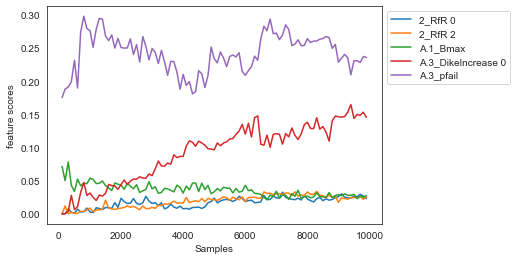

In [8]:
# Show convergence over time
fig, ax = plt.subplots(1)
combined_scores.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

#### 'Expected evacuation costs'

In [9]:
# calculate feature score
scores_EEC = feature_scoring.get_ex_feature_scores(experiments, outcomes['Expected Evacuation Costs'],
                                      max_features=17, mode=RuleInductionType.REGRESSION)[0]
scores_EEC

,1
0,
A.3_pfail,0.182026
A.3_DikeIncrease 0,0.072892
A.2_pfail,0.048715
EWS_DaysToThreat,0.039978
A.2_DikeIncrease 0,0.029096
A.5_pfail,0.027175
2_RfR 2,0.026034
2_RfR 0,0.024673
3_RfR 1,0.023329


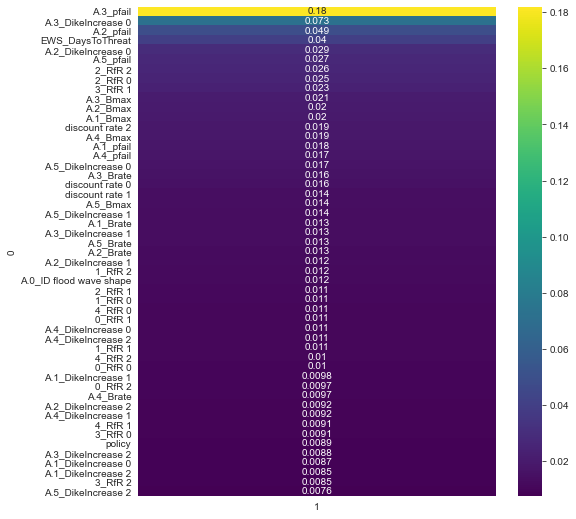

In [25]:
# Show results in heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores_EEC, cmap='viridis', annot=True)
fig.set_size_inches(8, 9, forward=True)
plt.savefig('./results/EEC_HM.png', bbox_inches='tight')
plt.show()

In [11]:
combined_scores_EEC = []

# Show convergence over the number of samples
for j in range(100, experiments.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments.iloc[0:j, :],
                                                   outcomes['Expected Evacuation Costs'][0:j],
                                                   max_features=17,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores_EEC.append(scores)

In [12]:
combined_scores_EEC = pd.concat(combined_scores_EEC, axis=1, sort=True)
outcomes_of_interest = ['2_RfR 0', 'A.3_pfail', 'A.3_DikeIncrease 0', '2_RfR 2', 'A.1_Bmax']
combined_scores_EEC = combined_scores_EEC[combined_scores_EEC.index.isin(outcomes_of_interest)]

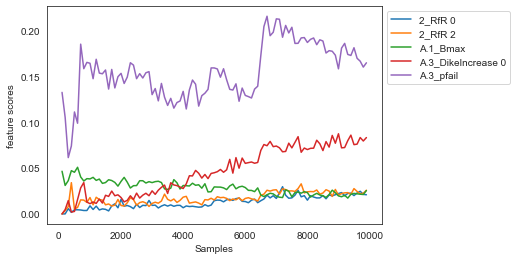

In [13]:
fig, ax = plt.subplots(1)
combined_scores_EEC.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

#### 'Expected number of deaths'

In [14]:
# Get feature scores
scores_ENoD = feature_scoring.get_ex_feature_scores(experiments, outcomes['A.3_Expected Annual Damage'],
                                      max_features=17, mode=RuleInductionType.REGRESSION)[0]
scores_ENoD

,1
0,
A.3_pfail,0.215955
A.3_DikeIncrease 0,0.159993
A.1_Bmax,0.032054
A.3_Bmax,0.026205
2_RfR 2,0.026043
A.4_pfail,0.024956
2_RfR 0,0.024945
discount rate 2,0.023530
A.2_Bmax,0.021012


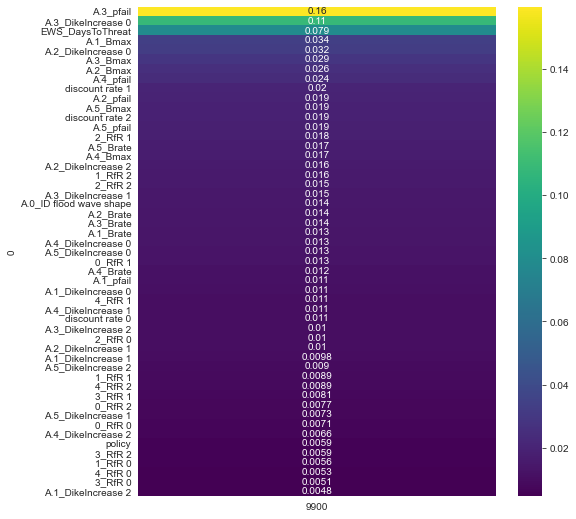

In [26]:
# Show feature scores in heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores_ENoD, cmap='viridis', annot=True)
fig.set_size_inches(8, 9, forward=True)
plt.savefig('./results/ENOD_HM.png', bbox_inches='tight')
plt.show()

In [16]:
# Show convergence over number of samples
combined_scores_ENoD = []
for j in range(100, experiments.shape[0], 100):
    scores_ENoD = feature_scoring.get_ex_feature_scores(experiments.iloc[0:j,:], outcomes['A.3_Expected Number of Deaths'][0:j],
                                                   max_features=17,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores_ENoD.columns = [j]
    combined_scores_ENoD.append(scores_ENoD)

In [17]:
combined_scores_ENoD = pd.concat(combined_scores_ENoD, axis=1, sort=True)
outcomes_of_interest = ['A.3_pfail', 'A.3_DikeIncrease 0', 'A.4_pfail', 'A.1_Bmax', 'A.3_Bmax']
combined_scores_ENoD = combined_scores_ENoD[combined_scores_ENoD.index.isin(outcomes_of_interest)]

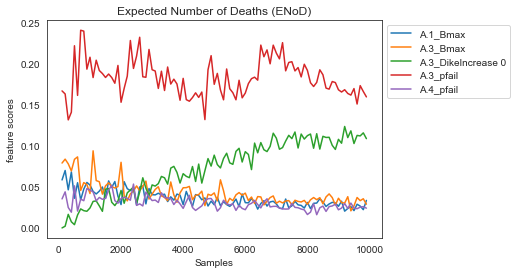

In [18]:
fig, ax = plt.subplots(1)
combined_scores_ENoD.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
ax.set_title("Expected Number of Deaths (ENoD)")
plt.savefig('./results/ENOD.png', bbox_inches='tight')
plt.show()